# WALK-RUN CLASSIFICATION

## Dataset Features Explanation

### 1. **date**
- The date when the data was recorded, in the format `YYYY-MM-DD`.
- Example: `2017-6-30`

### 2. **time**
- The exact timestamp of the data recording, including hours, minutes, seconds, and milliseconds.
- Example: `13:51:15:847724020`

### 3. **username**
- The name of the person whose activity data is being recorded.
- Example: `viktor`
- This feature may be used to track or compare data across different users.

### 4. **wrist**
- Indicates which wrist the device (e.g., smartwatch or fitness tracker) was worn on.
- `0` may represent one wrist (e.g., left), and `1` may represent the other (e.g., right).

### 5. **activity**
- The label feature representing the type of activity performed.
- `0` indicates **walking** and `1` indicates **running**.

### 6. **acceleration_x, acceleration_y, acceleration_z**
- These features represent the accelerometer readings along the **x**, **y**, and **z** axes.
-  Acceleration is used to find how much the speed of an object increases (or decreases) over time.
- Acceleration measures the rate of change of velocity, typically in units of **m/s²**.
- Higher values often suggest running, while lower, more stable values indicate walking.

### 7. **gyro_x, gyro_y, gyro_z**
- Represent the gyroscope readings along the **x**, **y**, and **z** axes.
- Gyroscope data measures the angular velocity (rotation) of the device, typically in **degrees per second**.
- Higher values may indicate more vigorous activity like running.


These features collectively help differentiate between walking and running activities based on motion data.



###  In our dataset 88588 rows and 11 columns are present.
### In our dataset 'ACTIVITY' is the our output or label feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('PRCP-1013-WalkRunClass (1).zip')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## Task 1:-Prepare a complete data analysis report on the given data.

## BASIC CHECKS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [4]:
data.shape # it shows the in our dataset 88588 rows and 11 columns are present

(88588, 11)

In [5]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [7]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [8]:
data.activity.unique()  
# In our dataset activity is our label column and it has the two classes 

array([0, 1], dtype=int64)

## TO FIND WHICH CLASS (0,1) REPRESENT THE WALK AND RUN.

- To find the acceleration magnitude to find the classes representation.
- If acceleration Magnitude is less means, That class represent the Walk.
- If acceleration Magnitude is high means, That class represent the Run.

  **acceleration_magnitude** *(Derived Feature)*:
- A calculated value representing the overall magnitude of acceleration using the formula:
  
  ```
  Magnitude = sqrt(x^2 + y^2 + z^2)
  ```

In [9]:
data['ACCELERATION_MAGNITUDE'] = ((data['acceleration_x']**2)+(data['acceleration_y']**2)
                                  +(data['acceleration_z']**2))**0.5

In [10]:
avg_acceleration = data.groupby('activity')['ACCELERATION_MAGNITUDE'].mean()
avg_acceleration

activity
0    1.076322
1    1.451963
Name: ACCELERATION_MAGNITUDE, dtype: float64

#### From the above calculation class 0 has the less acceleration, So it is represent the Walking.
#### From the above calculation class 1 has the high acceleration, So it is represent the Runing.

In [11]:
data['activity'].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

#### The above value counts shows both the classes are equaly present in the dataset. So, our dataset is balanced dataset.

In [12]:
data.duplicated().sum()

0

#### The above calculation shows there is no duplicates are present in the dataset.

In [13]:
data.isnull().sum()

date                      0
time                      0
username                  0
wrist                     0
activity                  0
acceleration_x            0
acceleration_y            0
acceleration_z            0
gyro_x                    0
gyro_y                    0
gyro_z                    0
ACCELERATION_MAGNITUDE    0
dtype: int64

#### The above calculation shows, null values are not present in the dataset

### >  Date and time features are in the object.
### > To convert the date and time features in datetime format.

In [14]:
time = [] # here we removing the seconds and microseconds
for i in range(len(data['time'])):
    x=data['time'][i]
    y=x.split(":")
    time.append(y[0:2])
time

[['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '51'],
 ['13', '5

In [15]:
time1 = []  # here we extracting the roundoff hour value
for i in time:
    joins=':'.join(i)
    time1.append((joins))

time1

['13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',
 '13:51',


In [16]:
len(time1)

88588

In [17]:
data['time']=time1# here we adding the time1 column into the dataset

In [18]:
data['time'].value_counts()

time
16:9     973
16:10    932
16:3     924
16:13    882
16:1     822
        ... 
21:2      45
17:49     39
20:56     28
20:16     19
14:15     15
Name: count, Length: 304, dtype: int64

In [19]:
x = data['time'].to_list()

for i in range(len(x)):
    if len(x[i]) == 4:  # Check if time is missing a leading zero or incomplete
        x[i] = x[i] + '0'
        
    if x[i][-2:]=='60':
        ints = int(x[i][:2])
        adds = ints + 1
        x[i] = str(adds)+':00'
    elif x[i][-2:]>='60':
        mins = int(x[i][-2:])-60
        adds = int(x[i][:2])+1
        x[i]= str(adds)+':'+str(mins)
        


data['time'] = x
print(data['time'])

0        13:51
1        13:51
2        13:51
3        13:51
4        13:51
         ...  
88583    21:30
88584    21:30
88585    21:30
88586    21:30
88587    21:30
Name: time, Length: 88588, dtype: object


In [20]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,ACCELERATION_MAGNITUDE
0,2017-6-30,13:51,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,2017-6-30,13:51,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,2017-6-30,13:51,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,2017-6-30,13:51,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,2017-6-30,13:51,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,21:30,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,2017-7-9,21:30,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,2017-7-9,21:30,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,2017-7-9,21:30,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    88588 non-null  object 
 1   time                    88588 non-null  object 
 2   username                88588 non-null  object 
 3   wrist                   88588 non-null  int64  
 4   activity                88588 non-null  int64  
 5   acceleration_x          88588 non-null  float64
 6   acceleration_y          88588 non-null  float64
 7   acceleration_z          88588 non-null  float64
 8   gyro_x                  88588 non-null  float64
 9   gyro_y                  88588 non-null  float64
 10  gyro_z                  88588 non-null  float64
 11  ACCELERATION_MAGNITUDE  88588 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 8.1+ MB


In [22]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,ACCELERATION_MAGNITUDE
0,2017-6-30,13:51,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,2017-6-30,13:51,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,2017-6-30,13:51,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,2017-6-30,13:51,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,2017-6-30,13:51,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,21:30,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,2017-7-9,21:30,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,2017-7-9,21:30,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,2017-7-9,21:30,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


# EDA

# (i) ACTIVITY:

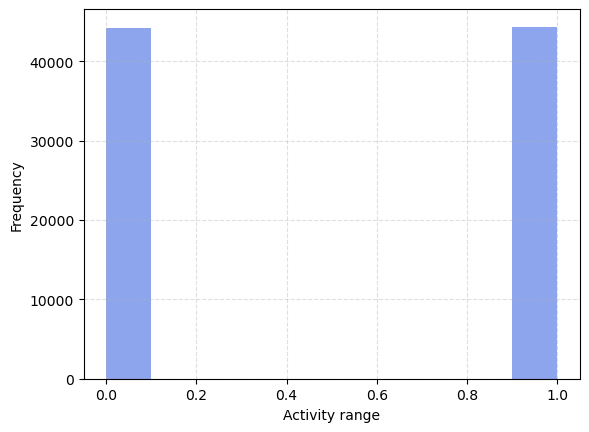

In [23]:
plt.hist(data['activity'],color='royalblue',alpha=0.6)
plt.xlabel('Activity range')
plt.ylabel('Frequency')
plt.grid(True,linestyle='--',alpha=0.4)
plt.show()

# (ii) WRIST:

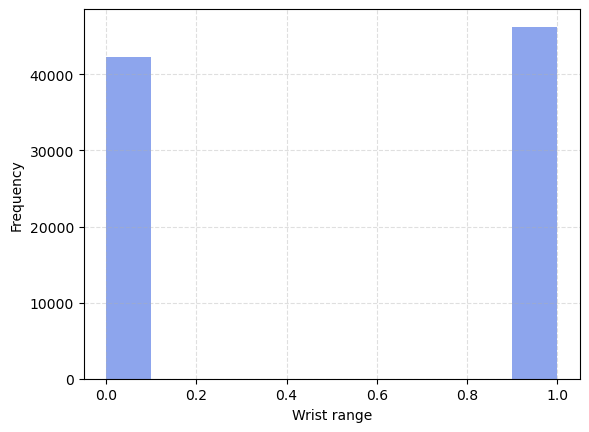

In [24]:
plt.hist(data['wrist'],color='royalblue',alpha=0.6)
plt.xlabel('Wrist range')
plt.ylabel('Frequency')
plt.grid(True,linestyle='--',alpha=0.4)
plt.show()

# (iii) ACCELERATION:

### ACCELERATION_X

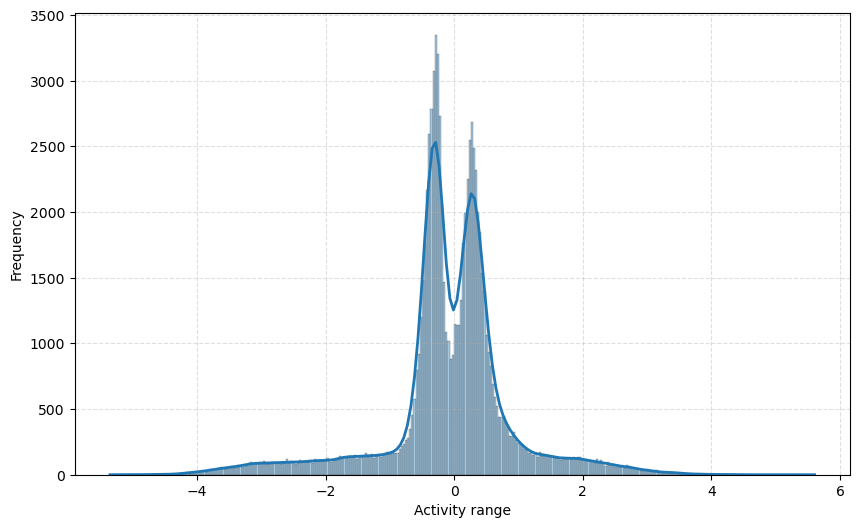

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data['acceleration_x'],alpha=0.4,kde=True,line_kws={'color':'black','linewidth':2})
plt.xlabel('Activity range')
plt.ylabel('Frequency')
plt.grid(True,linestyle='--',alpha=0.4)
plt.show()

### ACCELERATION_Y

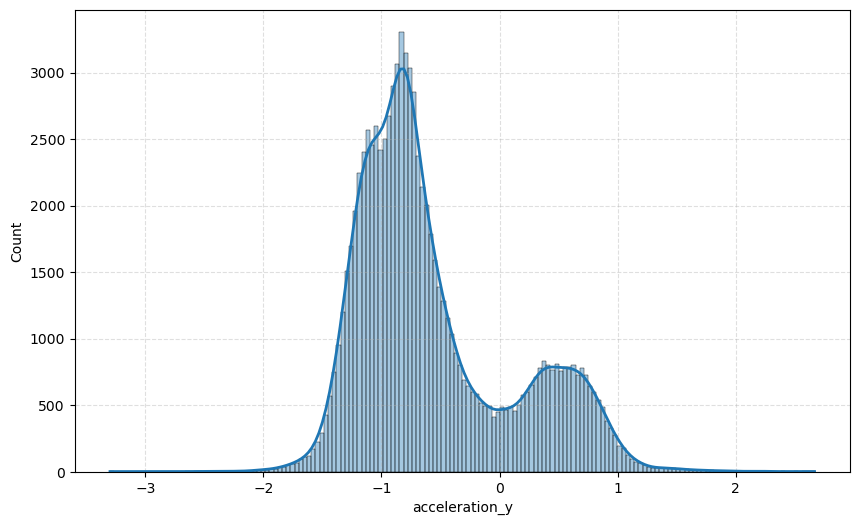

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data['acceleration_y'],kde=True,alpha=0.4,line_kws={'color':'black','linewidth':2})
plt.grid(True,linestyle='--',alpha=0.4)

### ACCELERATION_Z

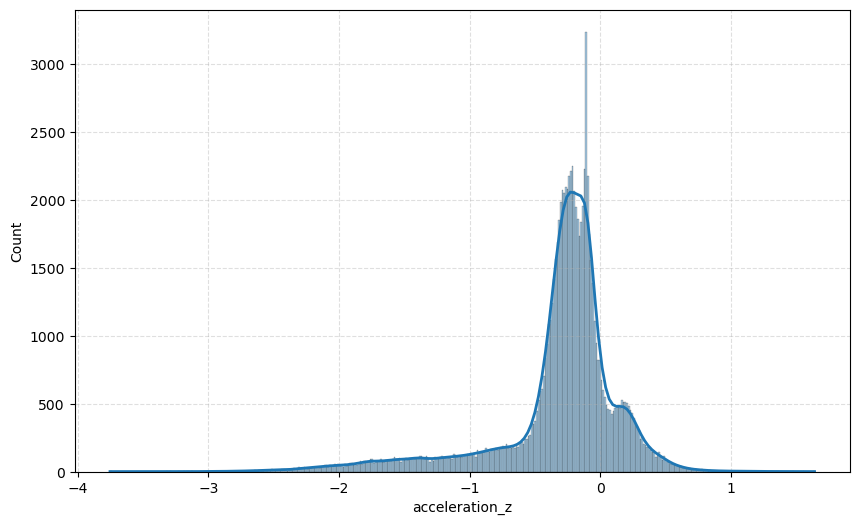

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data['acceleration_z'],kde=True,alpha=0.4,line_kws={'color':'black','linewidth':2})
plt.grid(True,linestyle='--',alpha=0.4)

### ACCELERATION_MAGNITUDE

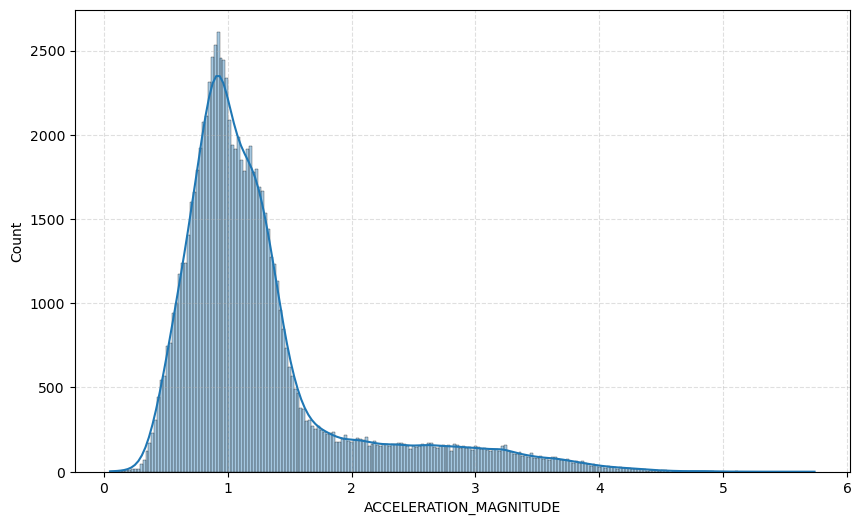

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data['ACCELERATION_MAGNITUDE'],kde=True,alpha=0.4)
plt.grid(True,linestyle='--',alpha=0.4)

# (iv) GYRO:

### GYRO_X

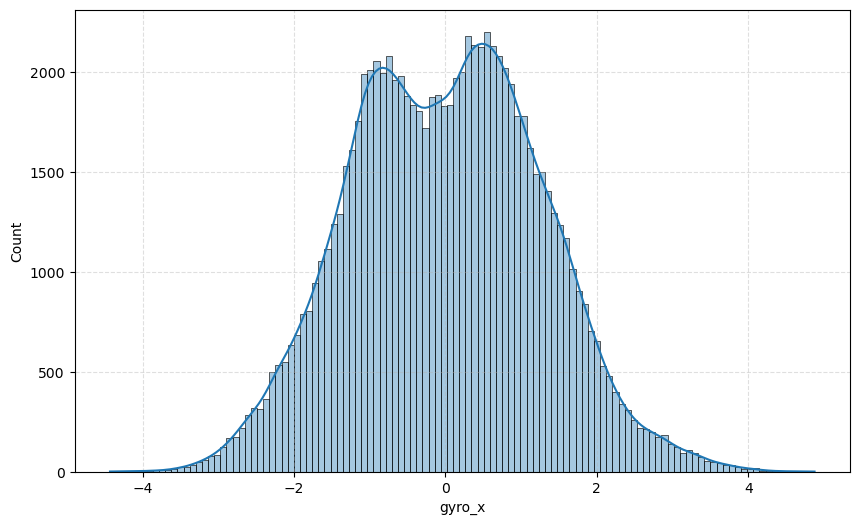

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data['gyro_x'],kde=True,alpha=0.4)
plt.grid(True,linestyle='--',alpha=0.4)

### GYRO_Y

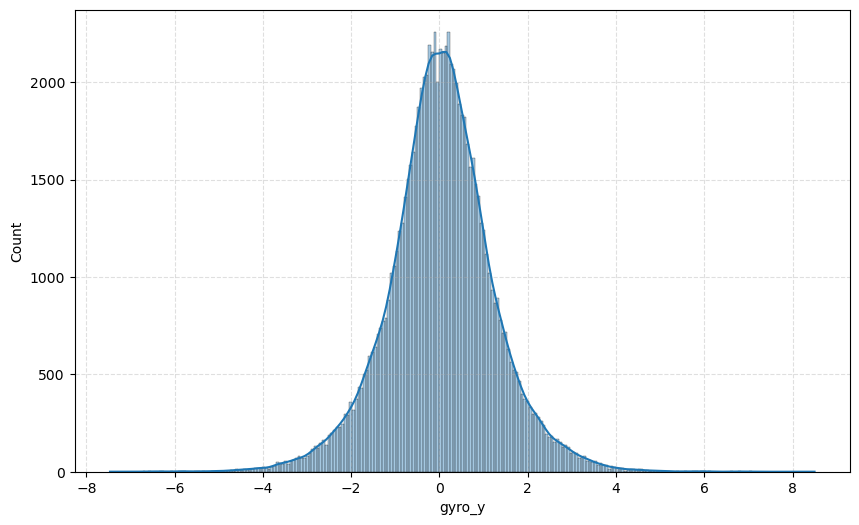

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data['gyro_y'],kde=True,alpha=0.4)
plt.grid(True,linestyle='--',alpha=0.4)

### GYRO_Z

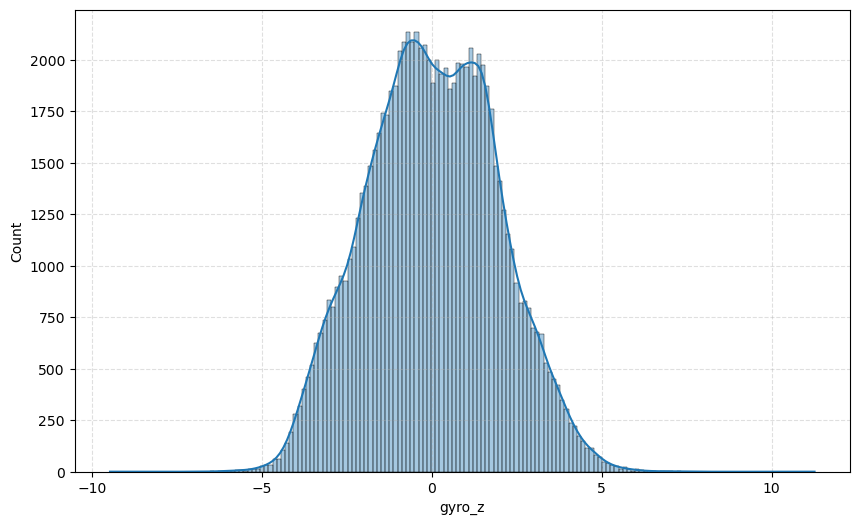

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['gyro_z'],kde=True,alpha=0.4)
plt.grid(True,linestyle='--',alpha=0.4)

In [33]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# FEATURE ENGINEERING

### (i) DUPLICATE VALUE HANDLING 

In [32]:
data.duplicated().sum()

0

- In our dataset, there is no duplicate values are present in the dataset

### (ii) NULL VALUES HANDLING

In [33]:
data.isnull().sum()

date                      0
time                      0
username                  0
wrist                     0
activity                  0
acceleration_x            0
acceleration_y            0
acceleration_z            0
gyro_x                    0
gyro_y                    0
gyro_z                    0
ACCELERATION_MAGNITUDE    0
dtype: int64

- In our dataset has no null values. So, no need to handle the null values.

## (iii) HANDLING SKEWED FEATURE

- To find the skewness and kurtosis in the each feature.
- Transform the each feature into normal distributed feature.

In [34]:
# here we finding the skewness and kurtosis of the feature.
features = data.select_dtypes(include=['number']).columns.tolist()
skew_data1 = {} # this variable contains the skewed features along with skewed and kurtosis value
nor_data ={} # this variable contains the normal feature along with skewed and kurtosis value
for i in features:
    skew = data[i].skew()
    kur = data[i].kurtosis()
    if -0.5 <=skew <=0.5:
        nor_data[i] = [skew,kur]
    else:
        skew_data1[i] = [skew,kur]

In [35]:
skew_data1 # this variable contains the skewed features and there values

{'acceleration_x': [-0.6209928906536413, 3.420517733493648],
 'acceleration_y': [0.9077471275417984, 0.017944286106925667],
 'acceleration_z': [-1.8377736726281553, 4.609746776681316],
 'ACCELERATION_MAGNITUDE': [1.9357376297103202, 3.7968755099952527]}

In [36]:
nor_data  # this variable contains the symetric distributed features

{'wrist': [-0.08876898879827767, -1.9921650430945268],
 'activity': [-0.003205910210631049, -2.0000348762791864],
 'gyro_x': [0.06908234482200133, -0.2717975984976766],
 'gyro_y': [-0.023932070195713858, 1.4895476914198604],
 'gyro_z': [0.04173247260382652, -0.3733115654625654]}

In [37]:
skew_data = pd.DataFrame(skew_data1,index=['skewness','kurtosis'])
skew_data  # This dataframe shows where  the skewness and kurtosis is high.

,acceleration_x,acceleration_y,acceleration_z,ACCELERATION_MAGNITUDE
skewness,-0.620993,0.907747,-1.837774,1.935738
kurtosis,3.420518,0.017944,4.609747,3.796876


### Transform  all skewed features to symmetric 
- We want to reduce the skewness of the features.
- We want to transform the features are acceleration_x, acceleration_y and acceleration_z.

In [38]:
data['acceleration_z'].max()

1.6403

#### ACCELERATION_X

In [39]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  
# here we using yeo-johnson, because acceleration_x contains the negative values and other techiques are not well perfrom
data['acceleration_x'] = pt.fit_transform(data[['acceleration_x']]) # here we transforming the data and store in the same variable


In [40]:
data['acceleration_x'].skew() # after data transformation skweness calculation.

0.09308277734278185

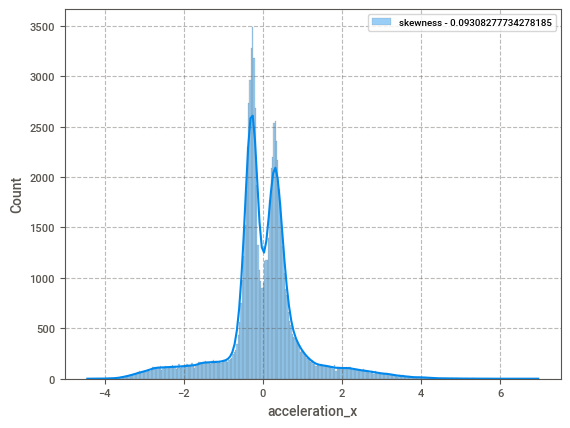

In [708]:
sns.histplot(data['acceleration_x'],kde=True,alpha = 0.4,label='skewness - 0.09308277734278185') # after the data transformation...
plt.grid(True,alpha=0.4,linestyle='--')
plt.legend(fontsize = 7)
plt.show()

#### ACCELERATION_Y

In [41]:
# here we using yeo-johnson, because acceleration_y contains the negative values and other techiques are not well perfrom
data['acceleration_y'] = pt.fit_transform(data[['acceleration_y']]) 
# here we transforming the data and store in the same variable

In [42]:
data['acceleration_y'].skew() # after the transformation... this much skweness is suitable for the model training

0.17987019917054503

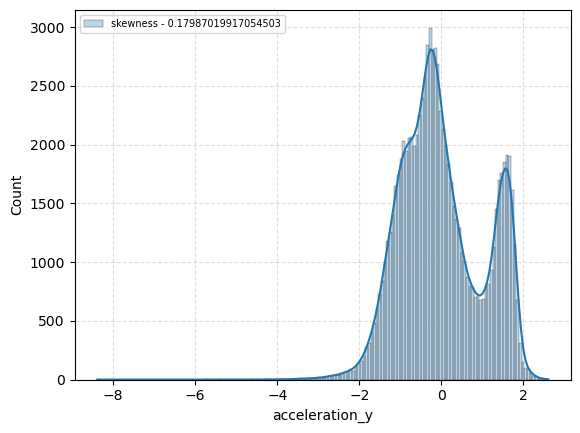

In [43]:
sns.histplot(data['acceleration_y'],kde=True,alpha=0.3,label='skewness - 0.17987019917054503')
# after the data transformation...
plt.grid(True,alpha=0.4,linestyle='--')
plt.legend(fontsize=7)
plt.show()

#### ACCELERATION_Z

In [44]:
# here we using yeo-johnson, because acceleration_y contains the negative values and other techiques are not well perfrom
data['acceleration_z'] = pt.fit_transform(data[['acceleration_z']]) 
# here we transforming the data and store in the same variable

In [45]:
data['acceleration_z'].skew() # here we can see the skweness is moderate...suitable for model 

0.20812746810340063

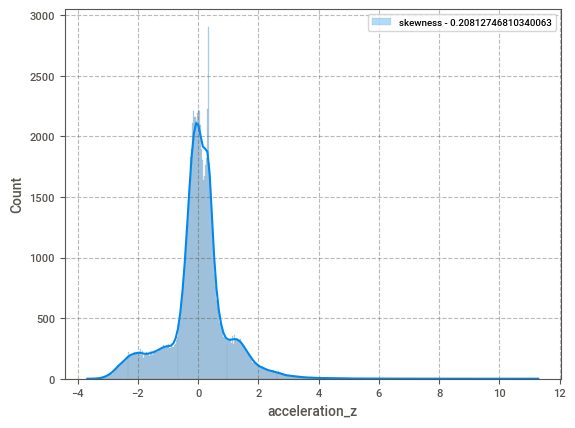

In [624]:
sns.histplot(data['acceleration_z'],kde=True,alpha=0.3,label='skewness - 0.20812746810340063') # after the data transformation...
plt.grid(True,alpha=0.4,linestyle='--')
plt.legend(fontsize = 7)
plt.show()

In [46]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,ACCELERATION_MAGNITUDE
0,2017-6-30,13:51,viktor,0,0,0.295856,-0.194465,0.628919,-0.0590,0.0325,-2.9296,0.825148
1,2017-6-30,13:51,viktor,0,0,0.733799,-0.931900,-0.004579,-0.1757,0.0208,0.1269,1.329887
2,2017-6-30,13:51,viktor,0,0,0.481504,-1.833449,0.892475,-0.9105,0.1063,-2.4367,1.547307
3,2017-6-30,13:51,viktor,0,0,0.335959,-0.256558,0.950323,0.1199,-0.4099,-2.9336,0.871729
4,2017-6-30,13:51,viktor,0,0,0.526117,-0.502741,0.769613,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,21:30,viktor,0,0,0.341553,-0.307401,0.260941,0.4823,2.0124,0.6048,0.902382
88584,2017-7-9,21:30,viktor,0,0,0.543696,-0.658044,-0.469706,0.1022,-1.2565,-0.0761,1.202684
88585,2017-7-9,21:30,viktor,0,0,0.501689,-1.061026,-0.121809,-1.4500,-0.2792,-1.2616,1.295380
88586,2017-7-9,21:30,viktor,0,0,0.289559,-0.349616,0.421761,-1.5165,0.4560,-1.7755,0.899638


In [47]:
len(data['time'].value_counts())

267

### (iv) NOW HANDLING THE DATE AND TIME FEATURES FOR MODEL

- The above date and time format is not acceptable for the ML models.
- Show we convert the date and time feature suitable format for models.

In [48]:
data['time'][0] # it gives the output in string

'13:51'

In [49]:
# here we separating the time columns

for i in range(len(data['time'])):
    split = data['time'][i].split(':')  # it contains the list of splited values
    data.at[i,'hours'] = int(split[0])  # store a new feature in the dataframe
    data.at[i,'minutes'] = int(split[1]) # store a new feature in the dataframe

In [50]:
# here we separating the date columns

for i in range(len(data['date'])):
    split = data['date'][i].split('-')  # it contains the list of splited values
    data.at[i,'year'] = int(split[0])  # store a new feature in the dataframe
    data.at[i,'month'] = int(split[1])  # store a new feature in the dataframe
    data.at[i,'day'] = int(split[2])   # store a new feature in the dataframe

In [51]:
data = data.drop(columns = ['date','time']) 
# here removing the date and time features, because we extract the new feature from that.

In [52]:
data  # After all process the dataframe looklikes.

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,ACCELERATION_MAGNITUDE,hours,minutes,year,month,day
0,viktor,0,0,0.295856,-0.194465,0.628919,-0.0590,0.0325,-2.9296,0.825148,13.0,51.0,2017.0,6.0,30.0
1,viktor,0,0,0.733799,-0.931900,-0.004579,-0.1757,0.0208,0.1269,1.329887,13.0,51.0,2017.0,6.0,30.0
2,viktor,0,0,0.481504,-1.833449,0.892475,-0.9105,0.1063,-2.4367,1.547307,13.0,51.0,2017.0,6.0,30.0
3,viktor,0,0,0.335959,-0.256558,0.950323,0.1199,-0.4099,-2.9336,0.871729,13.0,51.0,2017.0,6.0,30.0
4,viktor,0,0,0.526117,-0.502741,0.769613,0.0527,0.4379,2.4922,1.048889,13.0,51.0,2017.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.341553,-0.307401,0.260941,0.4823,2.0124,0.6048,0.902382,21.0,30.0,2017.0,7.0,9.0
88584,viktor,0,0,0.543696,-0.658044,-0.469706,0.1022,-1.2565,-0.0761,1.202684,21.0,30.0,2017.0,7.0,9.0
88585,viktor,0,0,0.501689,-1.061026,-0.121809,-1.4500,-0.2792,-1.2616,1.295380,21.0,30.0,2017.0,7.0,9.0
88586,viktor,0,0,0.289559,-0.349616,0.421761,-1.5165,0.4560,-1.7755,0.899638,21.0,30.0,2017.0,7.0,9.0


# (v) ENCODING

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   username                88588 non-null  object 
 1   wrist                   88588 non-null  int64  
 2   activity                88588 non-null  int64  
 3   acceleration_x          88588 non-null  float64
 4   acceleration_y          88588 non-null  float64
 5   acceleration_z          88588 non-null  float64
 6   gyro_x                  88588 non-null  float64
 7   gyro_y                  88588 non-null  float64
 8   gyro_z                  88588 non-null  float64
 9   ACCELERATION_MAGNITUDE  88588 non-null  float64
 10  hours                   88588 non-null  float64
 11  minutes                 88588 non-null  float64
 12  year                    88588 non-null  float64
 13  month                   88588 non-null  float64
 14  day                     88588 non-null

In [54]:
len(data['day'].value_counts())   #  totally 11 class are present in the hours feature

12

In [55]:
data['username'].value_counts() # In username has the only one class 

username
viktor    88588
Name: count, dtype: int64

- All features are in the numerical except **username**.
- **username** has the only one class... we are not giving the **username* to train a model.
- So no need to encoding.

# (vi) SCALING THE DATA

- We are appling the scaling for **hours , minuets, years and days**.
- Because, those features only has the high values. Other features are already in small values.

In [56]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(data[['hours','minutes','year','month','day']])


In [57]:
scaled_data # scaled values

array([[-1.7138057 ,  0.96772129,  0.        , -4.60340991,  2.79709517],
       [-1.7138057 ,  0.96772129,  0.        , -4.60340991,  2.79709517],
       [-1.7138057 ,  0.96772129,  0.        , -4.60340991,  2.79709517],
       ...,
       [ 1.72791829, -0.19516675,  0.        ,  0.21723028, -0.46574464],
       [ 1.72791829, -0.19516675,  0.        ,  0.21723028, -0.46574464],
       [ 1.72791829, -0.19516675,  0.        ,  0.21723028, -0.46574464]])

In [58]:
scaled_data = pd.DataFrame(scaled_data,columns = ['scaled_hours','scaled_minutes','scaled_year','scaled_month','scaled_day']) 

In [59]:
scaled_data

,scaled_hours,scaled_minutes,scaled_year,scaled_month,scaled_day
0,-1.713806,0.967721,0.0,-4.60341,2.797095
1,-1.713806,0.967721,0.0,-4.60341,2.797095
2,-1.713806,0.967721,0.0,-4.60341,2.797095
3,-1.713806,0.967721,0.0,-4.60341,2.797095
4,-1.713806,0.967721,0.0,-4.60341,2.797095
...,...,...,...,...,...
88583,1.727918,-0.195167,0.0,0.21723,-0.465745
88584,1.727918,-0.195167,0.0,0.21723,-0.465745
88585,1.727918,-0.195167,0.0,0.21723,-0.465745
88586,1.727918,-0.195167,0.0,0.21723,-0.465745


In [60]:
data = pd.concat([data,scaled_data],axis=1) # here adding the scaled data into the dataframe.

In [61]:
data

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,ACCELERATION_MAGNITUDE,hours,minutes,year,month,day,scaled_hours,scaled_minutes,scaled_year,scaled_month,scaled_day
0,viktor,0,0,0.295856,-0.194465,0.628919,-0.0590,0.0325,-2.9296,0.825148,13.0,51.0,2017.0,6.0,30.0,-1.713806,0.967721,0.0,-4.60341,2.797095
1,viktor,0,0,0.733799,-0.931900,-0.004579,-0.1757,0.0208,0.1269,1.329887,13.0,51.0,2017.0,6.0,30.0,-1.713806,0.967721,0.0,-4.60341,2.797095
2,viktor,0,0,0.481504,-1.833449,0.892475,-0.9105,0.1063,-2.4367,1.547307,13.0,51.0,2017.0,6.0,30.0,-1.713806,0.967721,0.0,-4.60341,2.797095
3,viktor,0,0,0.335959,-0.256558,0.950323,0.1199,-0.4099,-2.9336,0.871729,13.0,51.0,2017.0,6.0,30.0,-1.713806,0.967721,0.0,-4.60341,2.797095
4,viktor,0,0,0.526117,-0.502741,0.769613,0.0527,0.4379,2.4922,1.048889,13.0,51.0,2017.0,6.0,30.0,-1.713806,0.967721,0.0,-4.60341,2.797095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.341553,-0.307401,0.260941,0.4823,2.0124,0.6048,0.902382,21.0,30.0,2017.0,7.0,9.0,1.727918,-0.195167,0.0,0.21723,-0.465745
88584,viktor,0,0,0.543696,-0.658044,-0.469706,0.1022,-1.2565,-0.0761,1.202684,21.0,30.0,2017.0,7.0,9.0,1.727918,-0.195167,0.0,0.21723,-0.465745
88585,viktor,0,0,0.501689,-1.061026,-0.121809,-1.4500,-0.2792,-1.2616,1.295380,21.0,30.0,2017.0,7.0,9.0,1.727918,-0.195167,0.0,0.21723,-0.465745
88586,viktor,0,0,0.289559,-0.349616,0.421761,-1.5165,0.4560,-1.7755,0.899638,21.0,30.0,2017.0,7.0,9.0,1.727918,-0.195167,0.0,0.21723,-0.465745


# (vii) MODEL BUILDING

## SPLITING THE DATA

In [62]:
data = data.drop(columns = ['hours','minutes','day','year','month','username','ACCELERATION_MAGNITUDE'])

In [63]:
data  # After droping the unnesscary features from the dataframe

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,scaled_hours,scaled_minutes,scaled_year,scaled_month,scaled_day
0,0,0,0.295856,-0.194465,0.628919,-0.0590,0.0325,-2.9296,-1.713806,0.967721,0.0,-4.60341,2.797095
1,0,0,0.733799,-0.931900,-0.004579,-0.1757,0.0208,0.1269,-1.713806,0.967721,0.0,-4.60341,2.797095
2,0,0,0.481504,-1.833449,0.892475,-0.9105,0.1063,-2.4367,-1.713806,0.967721,0.0,-4.60341,2.797095
3,0,0,0.335959,-0.256558,0.950323,0.1199,-0.4099,-2.9336,-1.713806,0.967721,0.0,-4.60341,2.797095
4,0,0,0.526117,-0.502741,0.769613,0.0527,0.4379,2.4922,-1.713806,0.967721,0.0,-4.60341,2.797095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,0,0,0.341553,-0.307401,0.260941,0.4823,2.0124,0.6048,1.727918,-0.195167,0.0,0.21723,-0.465745
88584,0,0,0.543696,-0.658044,-0.469706,0.1022,-1.2565,-0.0761,1.727918,-0.195167,0.0,0.21723,-0.465745
88585,0,0,0.501689,-1.061026,-0.121809,-1.4500,-0.2792,-1.2616,1.727918,-0.195167,0.0,0.21723,-0.465745
88586,0,0,0.289559,-0.349616,0.421761,-1.5165,0.4560,-1.7755,1.727918,-0.195167,0.0,0.21723,-0.465745


In [64]:
x = data.drop(columns = ['activity'])  # here, x variable store only input features.
y = data.activity  # here, y variable store only label feature.

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70870, 12)
(17718, 12)
(70870,)
(17718,)


## MODEL IMPLEMENTATION

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  
model.fit(x_train,y_train)   # fit and train our model 

LogisticRegression()

In [68]:
prediction = model.predict(x_test) # from the trained model make some prediction

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
accuracy_score(y_test,prediction)  
# compare the prdiction and orginal value ... calculate the accuracy how much our model predict well.

0.9352635737667908

In [71]:
confusion_matrix(y_test,prediction) # it gives the confusion matrix of our model

array([[8101,  727],
       [ 420, 8470]], dtype=int64)

In [72]:
print(classification_report(y_test,prediction)) # it gives the classification report for over model.

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8828
           1       0.92      0.95      0.94      8890

    accuracy                           0.94     17718
   macro avg       0.94      0.94      0.94     17718
weighted avg       0.94      0.94      0.94     17718



### FINDING THE TESTING ACCURACY

In [73]:
train_predict = model.predict(x_train)

In [74]:
accuracy_score(y_train,train_predict)  # here we can see the training accuracy

0.9357697192041766

#### TRAINING ACCURACY - 0.9357697192041766
#### TESTING ACCURACY - 0.9352635737667908

# FINDING THE BEST MODEL FOR THE BEST ACCURACY

### TESTING ACCURACY

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), SVC(), RandomForestClassifier(), KNeighborsClassifier()]

acc_model = {}
for model in models:
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test, prediction)
    acc_model[model] = acc

print(acc_model)   # It shows the testing accuracy of different models

{LogisticRegression(): 0.9352635737667908, SVC(): 0.9972908906197088, RandomForestClassifier(): 0.9986454453098544, KNeighborsClassifier(): 0.9980810475222938}


### TRAINING ACCURACY

In [76]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), KNeighborsClassifier()]

Acc_model = {}
for model in models:
    model.fit(x_train, y_train)
    prediction = model.predict(x_train)
    acc = accuracy_score(y_train, prediction)
    Acc_model[model] = acc

print(Acc_model)  # It shows the training accuracy of different models

{LogisticRegression(): 0.9357697192041766, SVC(): 0.9972202624523776, RandomForestClassifier(): 1.0, KNeighborsClassifier(): 0.9983490898828842}


## LOGISTICREGRESSION :
   #### TRAINING ACCURACY - 0.9357697192041766
   #### TESTING ACCURACY - 0.9352635737667908

## SVC :
   #### TRAINING ACCURACY - 0.9972202624523776
   #### TESTING ACCURACY - 0.9972908906197088
    
## RANDOMFORESTCLASSIFIER :
   #### TRAINING ACCURACY - 1.0
   #### TESTING ACCURACY - 0.9987583248673665
    
## KNEIGHBORSCLASSIFIER :
   #### TRAINING ACCURACY - 0.9983490898828842
   #### TESTING ACCURACY - 0.9980810475222938

In [88]:
training = list(Acc_model.values())
testing = list(acc_model.values())
model = ['LR','SVC','RF','KNN']

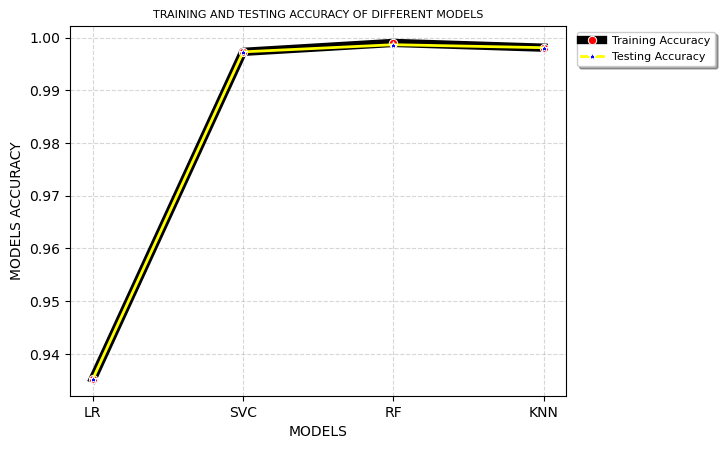

In [128]:
sns.lineplot(x=model,y=training,marker='o',linewidth=6,color='black',markerfacecolor='red',label='Training Accuracy')
sns.lineplot(x=model,y=testing,marker='*',linewidth=2,color='yellow',markerfacecolor='blue',label='Testing Accuracy')
plt.xlabel('MODELS')
plt.ylabel('MODELS ACCURACY')
plt.grid(True,linestyle='--',alpha=0.5)
plt.title('TRAINING AND TESTING ACCURACY OF DIFFERENT MODELS',fontsize=8)
plt.legend(bbox_to_anchor=(1.01,1),fontsize=8,shadow=True)
plt.show()

# CHALLENGES :

#### - In this dataset, when handling the **date** and **time** feature is more complicated . 
#### - What ever, finally the model has been successfully builded and accuracy was so good.